# iSarcasmEval EDA
EDA, Adjustments, Balancing, and Exporting

## Imports & Settings

In [1]:
import os
os.chdir('..')
# os.getcwd( )

In [2]:
from utils import *

import re
import string
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import datasets
from datasets import load_dataset, load_metric, Dataset

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jarradjinx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset
The iSarcasmEval dataset is available at https://sites.google.com/view/semeval2022-isarcasmeval

In [3]:
dataset_df = pd.read_csv('data/target_iSarcasmEval/source_iSarcasmEval-main_semEval2022_en/train/train.En.csv', index_col=0)
dataset_df = dataset_df.rename(columns={'tweet': 'text'})

dataset_df.head(100)

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
95,@PFTompkins Her family should definitely not s...,1,They should seek guidance.,1.0,0.0,0.0,0.0,0.0,0.0
96,How I flirt with boys \n\nBoy: “Hey I saw you ...,1,I could have said thanks for coming over,1.0,0.0,0.0,0.0,0.0,1.0
97,Been trying to get my boyfriends attention. Le...,1,Sitting next to my boyfriend but he'll notice ...,1.0,0.0,0.0,0.0,0.0,0.0
98,My work email isn’t working so I can just log ...,1,I wish I would log off for the day because my ...,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 3467 non-null   object 
 1   sarcastic            3468 non-null   int64  
 2   rephrase             867 non-null    object 
 3   sarcasm              867 non-null    float64
 4   irony                867 non-null    float64
 5   satire               867 non-null    float64
 6   understatement       867 non-null    float64
 7   overstatement        867 non-null    float64
 8   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 270.9+ KB


## Remove Null

In [5]:
nan_in_tweet  = dataset_df[dataset_df['text'].isna()]
nan_in_tweet.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
1062,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset_df = dataset_df.dropna(subset=['text'])

dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3467
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   text                 3467 non-null   object 
 1   sarcastic            3467 non-null   int64  
 2   rephrase             867 non-null    object 
 3   sarcasm              867 non-null    float64
 4   irony                867 non-null    float64
 5   satire               867 non-null    float64
 6   understatement       867 non-null    float64
 7   overstatement        867 non-null    float64
 8   rhetorical_question  867 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 270.9+ KB


In [7]:
nan_in_rephrase  = dataset_df[dataset_df['rephrase'].isna()]
nan_in_rephrase.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
867,I always think going braless is a good idea un...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868,life is so much better with a heating blanket,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
869,Sometimes I just go through my phone and look ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
870,was not back in the states for even 5 minutes ...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,in desperate need of (and I can NOT stress thi...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## View Label Distribution

[Text(0, 0, '2600'), Text(0, 0, '867')]

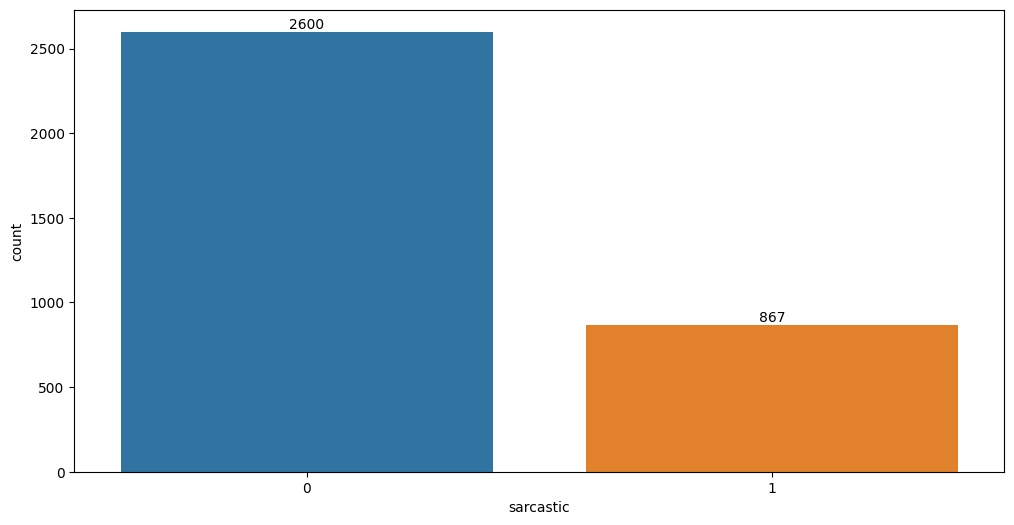

In [8]:
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='sarcastic', data=dataset_df)
ax.bar_label(ax.containers[0])

## View Word Counts & Word Count Distribution 

In [9]:
dataset_df['num_word_text'] = dataset_df['text'].apply(lambda x:len(str(x).split()))
dataset_df.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text
0,The only thing I got from college is a caffein...,1,"College is really difficult, expensive, tiring...",0.0,1.0,0.0,0.0,0.0,0.0,11
1,I love it when professors draw a big question ...,1,I do not like when professors don’t write out ...,1.0,0.0,0.0,0.0,0.0,0.0,26
2,Remember the hundred emails from companies whe...,1,"I, at the bare minimum, wish companies actuall...",0.0,1.0,0.0,0.0,0.0,0.0,36
3,Today my pop-pop told me I was not “forced” to...,1,"Today my pop-pop told me I was not ""forced"" to...",1.0,0.0,0.0,0.0,0.0,0.0,17
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,I would say Ted Cruz is an asshole and doesn’t...,1.0,0.0,0.0,0.0,0.0,0.0,29


In [10]:
dataset_df.describe()

,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text
count,3467.000000,867.000000,867.000000,867.000000,867.000000,867.000000,867.000000,3467.000000
mean,0.250072,0.822376,0.178777,0.028835,0.011534,0.046136,0.116494,18.833285
std,0.433117,0.382417,0.383387,0.167439,0.106837,0.209901,0.321001,11.276871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,61.000000


<AxesSubplot: xlabel='num_word_text', ylabel='Count'>

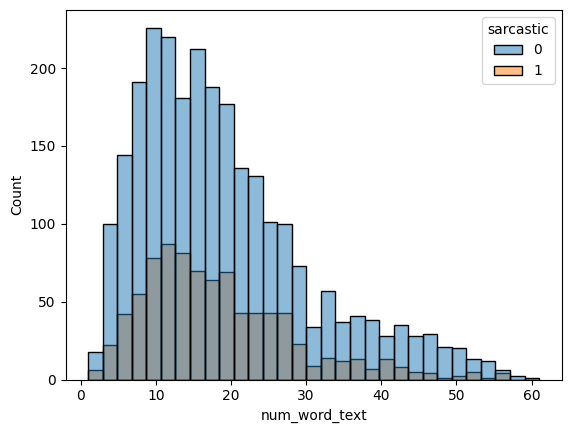

In [11]:
sns.histplot(x="num_word_text", data=dataset_df,  hue="sarcastic")

In [12]:
pd.options.display.max_colwidth = 100
dataset_df['text']

0                                                 The only thing I got from college is a caffeine addiction
1       I love it when professors draw a big question mark next to my answer on an exam because I’m alwa...
2       Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in...
3                          Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee
4       @VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worr...
                                                       ...                                                 
3463                                  The population spike in Chicago in 9 months is about to be ridiculous
3464         You'd think in the second to last English class of the year my prof would stop calling me Sean
3465    I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (ho...
3466    Couldn't be prouder 

In [13]:
pd.options.display.max_colwidth = 200
dataset_df.loc[dataset_df['num_word_text'] == 61]


,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text
1585,I remember when I was a kid how I used to troll my dad. \nI’d be watching a film on sky movies and then when I knew he was in the other room I would say out loud ‘wow look at the tits on her’ \nHe...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61


## View Common Words

In [14]:
# cleaning for word-based EDA
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [15]:
dataset_df['text'] = dataset_df['text'].apply(lambda x:clean_text(x))
dataset_df['temp_list'] = dataset_df['text'].apply(lambda x:str(x).split())
dataset_df['text_stopped'] = dataset_df['temp_list'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])
dataset_df.head()

,text,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question,num_word_text,temp_list,text_stopped
0,the only thing i got from college is a caffeine addiction,1,"College is really difficult, expensive, tiring, and I often question if a degree is worth the stress.",0.0,1.0,0.0,0.0,0.0,0.0,11,"[the, only, thing, i, got, from, college, is, a, caffeine, addiction]","[thing, got, college, caffeine, addiction]"
1,i love it when professors draw a big question mark next to my answer on an exam because i’m always like yeah i don’t either ¯ツ¯,1,I do not like when professors don’t write out specific notes on my answers to exams.,1.0,0.0,0.0,0.0,0.0,0.0,26,"[i, love, it, when, professors, draw, a, big, question, mark, next, to, my, answer, on, an, exam, because, i’m, always, like, yeah, i, don’t, either, ¯ツ¯]","[love, professors, draw, big, question, mark, next, answer, exam, i’m, always, like, yeah, don’t, either, ¯ツ¯]"
2,remember the hundred emails from companies when covid started getting real i’ve gotten three in regards to support for protests and only savagexfenty shared helpful links and actually said black l...,1,"I, at the bare minimum, wish companies actually cared about marginalized communities. At the max, that our capitalistic society is dismantled.",0.0,1.0,0.0,0.0,0.0,0.0,36,"[remember, the, hundred, emails, from, companies, when, covid, started, getting, real, i’ve, gotten, three, in, regards, to, support, for, protests, and, only, savagexfenty, shared, helpful, links...","[remember, hundred, emails, companies, covid, started, getting, real, i’ve, gotten, three, regards, support, protests, savagexfenty, shared, helpful, links, actually, said, black, lives, matter, l..."
3,today my poppop told me i was not “forced” to go to college 🙃 okay sure sureeee,1,"Today my pop-pop told me I was not ""forced"" to go to college. That's not true.",1.0,0.0,0.0,0.0,0.0,0.0,17,"[today, my, poppop, told, me, i, was, not, “forced”, to, go, to, college, 🙃, okay, sure, sureeee]","[today, poppop, told, “forced”, go, college, 🙃, okay, sure, sureeee]"
4,volphancarol littlewhitty mysticalmanatee i did too and i also reported cancun cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to mexico,1,I would say Ted Cruz is an asshole and doesn’t actually care about people/babies/fetuses. He just wants to wage a war on women and keep the patriarchy in power.,1.0,0.0,0.0,0.0,0.0,0.0,29,"[volphancarol, littlewhitty, mysticalmanatee, i, did, too, and, i, also, reported, cancun, cruz, not, worrying, about, the, heartbeats, of, his, constituents, without, electricity, or, heat, when,...","[volphancarol, littlewhitty, mysticalmanatee, also, reported, cancun, cruz, worrying, heartbeats, constituents, without, electricity, heat, fled, mexico]"


In [16]:
sarcastic_df = dataset_df.loc[dataset_df['sarcastic'] == 1]
not_sarcastic_df = dataset_df.loc[dataset_df['sarcastic'] == 0]

top_sarcastic = Counter([item for sublist in sarcastic_df['text_stopped'] for item in sublist])
top_sarcastic_temp = pd.DataFrame(top_sarcastic.most_common(20))
top_sarcastic_temp.columns = ['common_words','count']
top_sarcastic_temp

,common_words,count
0,love,83
1,like,67
2,i’m,61
3,get,59
4,day,56
5,im,44
6,one,42
7,time,42
8,people,41
9,really,40


<AxesSubplot: xlabel='count', ylabel='common_words'>

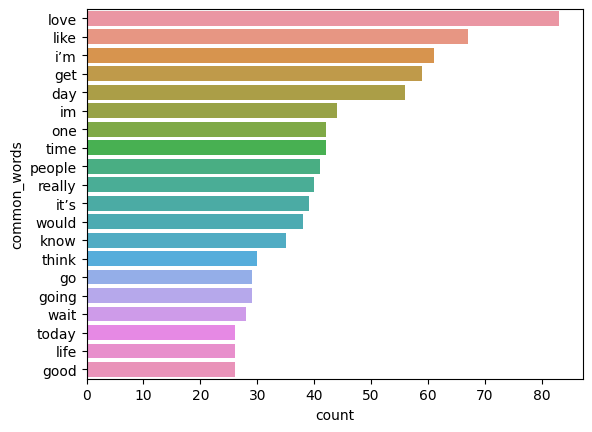

In [17]:
sns.barplot(x='count',y='common_words', data=top_sarcastic_temp)

In [18]:
top_not_sarcastic = Counter([item for sublist in not_sarcastic_df['text_stopped'] for item in sublist])
top_not_sarcastic_temp = pd.DataFrame(top_not_sarcastic.most_common(20))
top_not_sarcastic_temp.columns = ['common_words','count']
top_not_sarcastic_temp

,common_words,count
0,like,197
1,i’m,161
2,one,160
3,time,153
4,get,151
5,people,143
6,im,130
7,love,129
8,it’s,112
9,really,108


<AxesSubplot: xlabel='count', ylabel='common_words'>

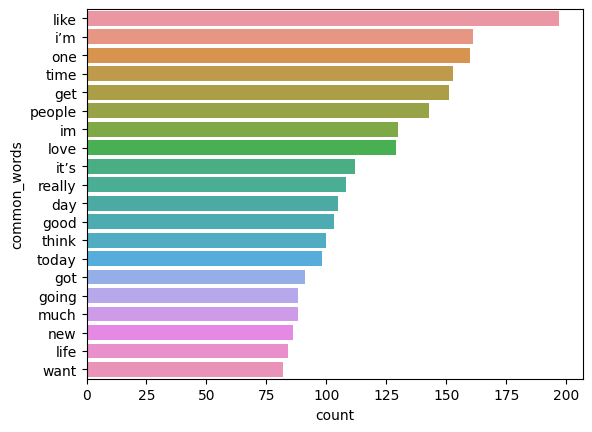

In [19]:
sns.barplot(x='count',y='common_words', data=top_not_sarcastic_temp)

## Adjust & Export Datasets for Train/test

## Prep Training/Validation Data

In [20]:
dataset_df_prep = pd.read_csv('data/target_iSarcasmEval/source_iSarcasmEval-main_semEval2022_en/train/train.En.csv', index_col=0)
dataset_df_prep.head()

,tweet,sarcastic,rephrase,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffeine addiction,1,"College is really difficult, expensive, tiring, and I often question if a degree is worth the stress.",0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1,I do not like when professors don’t write out specific notes on my answers to exams.,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1,"I, at the bare minimum, wish companies actually cared about marginalized communities. At the max, that our capitalistic society is dismantled.",0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1,"Today my pop-pop told me I was not ""forced"" to go to college. That's not true.",1.0,0.0,0.0,0.0,0.0,0.0
4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1,I would say Ted Cruz is an asshole and doesn’t actually care about people/babies/fetuses. He just wants to wage a war on women and keep the patriarchy in power.,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
dataset_df_prep = dataset_df_prep.rename(columns={'tweet': 'text', 'sarcastic': 'label'})
dataset_df_prep = dataset_df_prep[['text', 'label']]
dataset_df_prep

,text,label
0,The only thing I got from college is a caffeine addiction,1
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1
3,Today my pop-pop told me I was not “forced” to go to college 🙃 okay sure sureeee,1
4,"@VolphanCarol @littlewhitty @mysticalmanatee I did too, and I also reported Cancun Cruz not worrying about the heartbeats of his constituents without electricity or heat when he fled to Mexico.",1
...,...,...
3463,The population spike in Chicago in 9 months is about to be ridiculous,0
3464,You'd think in the second to last English class of the year my prof would stop calling me Sean,0
3465,I’m finally surfacing after a holiday to Scotland and a difficult few days with an ill child (hopefully on the mend now). Happy September all! Smell the pencil shavings and that new notebook aroma...,0
3466,"Couldn't be prouder today. Well done to every student who got their GCSEs this morning after 18 months that would challenge anyone in history, at any stage in their lives. The teachers did an amaz...",0


In [22]:
dataset_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3468 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3467 non-null   object
 1   label   3468 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [23]:
# drop rows with no text
dataset_df_prep = dataset_df_prep.dropna(subset=['text'])
dataset_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3467 non-null   object
 1   label   3467 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 81.3+ KB


In [24]:
dataset_df_prep['label'].value_counts()

0    2600
1     867
Name: label, dtype: int64

### Validation Split
We will split the validation set from the Train set before oversampling. This ensures that we do not include duplicate training samples in the validation split.

In [25]:
# sample the prepped dataset
isarcasm_validation = dataset_df_prep.sample(628, random_state=1)
isarcasm_validation

,text,label
161,wow i love only ever buying gray and striped shirts,1
839,Just tested my egg drop at my apartment complex and it fell on a man’s head :) but no worries he was bald so the yolk just wiped right off,1
613,Matt Hancock is a top shagger,1
1083,"Hello @Ocado, I just had my food shopping delivered by a man called Gary and honestly he was one of the nicest drivers I have ever had. He was attentive, talkative and was interested in how our d...",0
1769,bo burnham owes me absolutely nothing but i think he should put make happy on spotify i need to sob to the burrito song,0
...,...,...
1139,"now that I’m working in the commercial talent business, I can’t help but wonder how much Jake from State Farm gets paid. I think about it every time I see a SF commercial",0
2074,hey @phoebe_bridgers i’m free tomorrow btw. The 14th. I’m free on the 14th. Tomorrow. fyi😃,0
2673,✨florence pughs nose✨,0
2793,Using jazz as a reading playlist has reminded me one thing: I love Ella Fitzgerald,0


In [26]:
# remove validation set samples from preped dataset
dataset_df_prep = dataset_df_prep.drop(isarcasm_validation.index)
dataset_df_prep


,text,label
0,The only thing I got from college is a caffeine addiction,1
1,I love it when professors draw a big question mark next to my answer on an exam because I’m always like yeah I don’t either ¯\_(ツ)_/¯,1
2,Remember the hundred emails from companies when Covid started getting real? I’ve gotten three in regards to support for protests. And only @SavageXFenty shared helpful links and actually said blac...,1
5,"@jimrossignol I choose to interpret it as ""XD"": the universal emoticon for laughing at those poor, poor folks in Ubisoft's marketing department who have to deal with that branding until the server...",1
8,Loving season 4 of trump does America. Funniest season yet #DonaldTrump #Trump #MAGA #MAGA2020,1
...,...,...
3461,Mustard has no business being zero calories,0
3462,In case nobody is watching the #MINNvsBAMA game Alabama only has 4 players to play with,0
3464,You'd think in the second to last English class of the year my prof would stop calling me Sean,0
3466,"Couldn't be prouder today. Well done to every student who got their GCSEs this morning after 18 months that would challenge anyone in history, at any stage in their lives. The teachers did an amaz...",0


In [27]:
# check that validation set is removed
dataset_df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839 entries, 0 to 3467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2839 non-null   object
 1   label   2839 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 66.5+ KB


628


Text(0.5, 1.0, 'Validation Set Label Distribution')

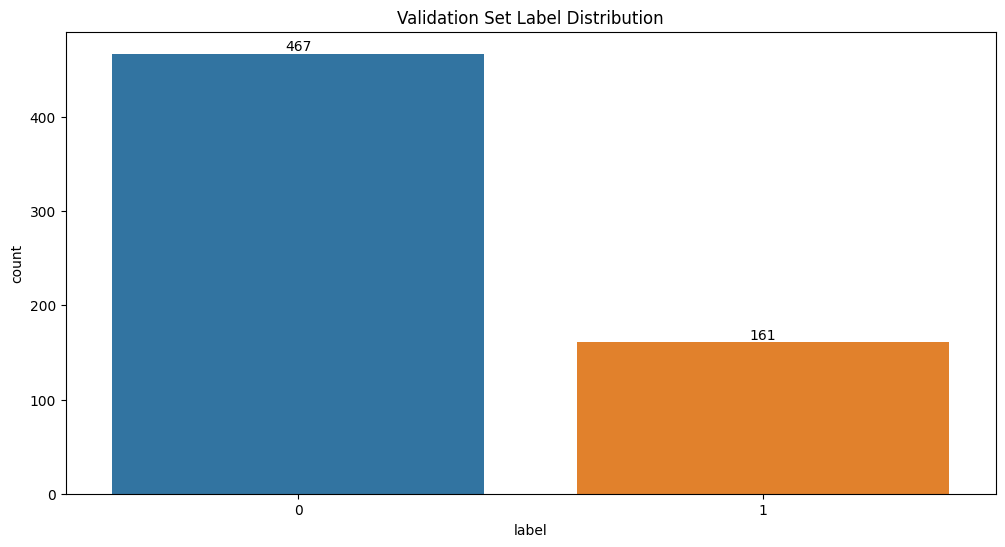

In [28]:
print(len(isarcasm_validation))
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=isarcasm_validation)
ax.bar_label(ax.containers[0])
plt.title("Validation Set Label Distribution")

### Oversample Underrepresented Class
Here we use random sampling of the underepresented class to balance the dataset.

2839


Text(0.5, 1.0, 'Preped Dataset, Val Removed Set Label Distribution')

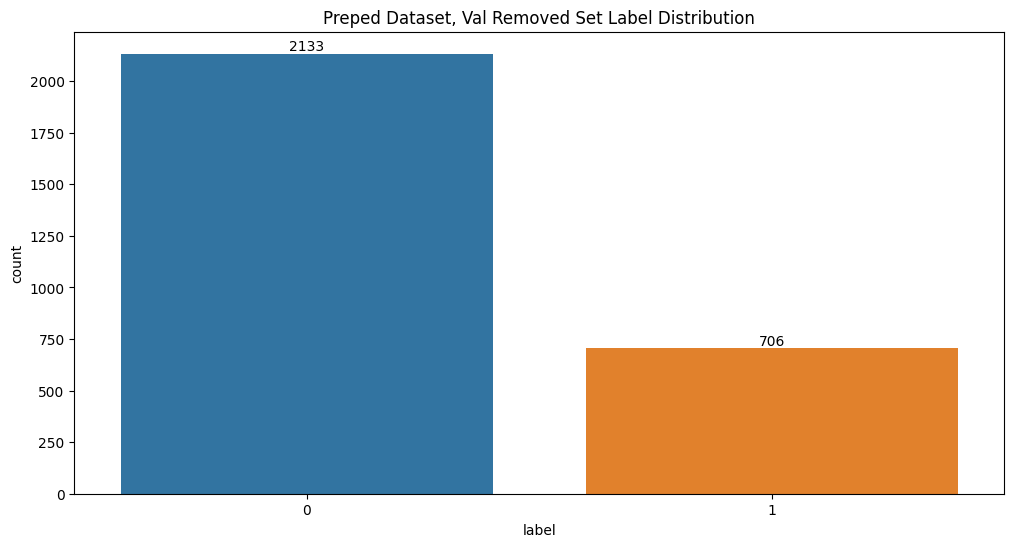

In [29]:
print(len(dataset_df_prep))
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=dataset_df_prep)
ax.bar_label(ax.containers[0])
plt.title("Preped Dataset, Val Removed Set Label Distribution")

### Train Split

In [30]:
def oversample(df):
    classes = df.label.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['label'] == key]) 
    classes_sample = []
    
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    return final_df

oversampled_df = oversample(dataset_df_prep)

In [31]:
# shuffle dataframe
isarcasm_train = oversampled_df.sample(frac=1)
isarcasm_train['label'].value_counts()

1    2133
0    2133
Name: label, dtype: int64

In [32]:
isarcasm_train.head(50)

,text,label
724,@Chris_Ransom @CityView1904 @Uzzell01 @BBCSport Aware she was not a tennis player when she left Canada at 2 yrs old?? aware she did not pick up a tennis racket until 6 years old??.aware last12 yea...,1
1645,Holly Arnold ??? Who #ImACeleb #MBE nope not sure oh hang on you mean MBE yes that’s her !!!,1
1161,maybe i am a cyber bully,1
1087,just found ive been walking on a broken foot for the past 6 months 🤪🤪🤪,1
3653,"Ask if there is a continuity team you can be a part of, or if you can see the same midwife throughout your pregnancy- easier to ask questions and raise concerns to a familiar person https://t.co/b...",0
3443,Someone come play Magic with me,0
3121,Great effort @Patriots We'll get em all next year,0
3576,"#DelitterUK this is our place, not just yours. Keep it litter free!",0
1167,The control button just fell off my laptop. How symbolic for my life.,1
4200,My mental state is getting dangerously close to Ben Wyatt’s that time he spent weeks on a 3 second claymation movie,0


4266


Text(0.5, 1.0, 'Trained Dataset, Val Removed, Oversampled Label Distribution')

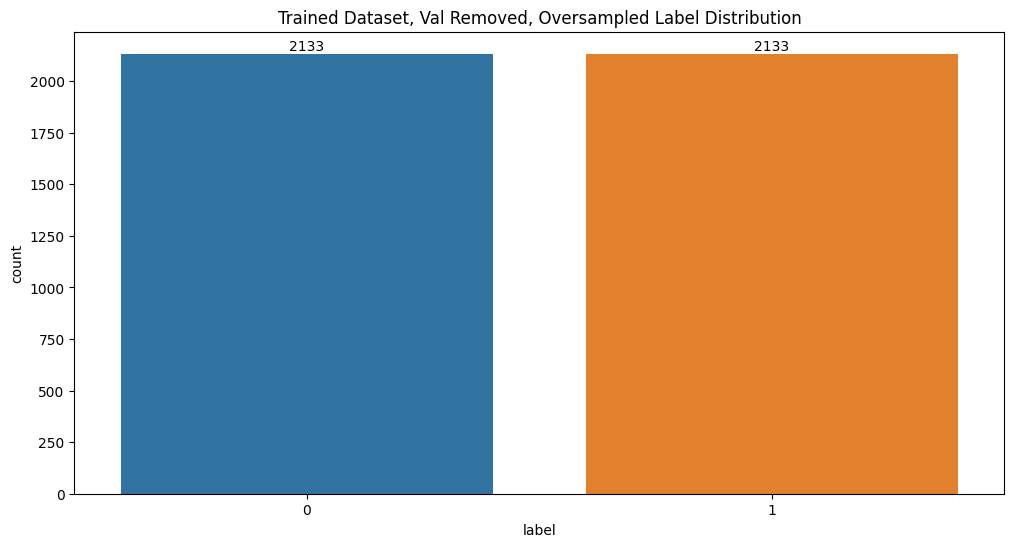

In [33]:
print(len(isarcasm_train))
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=isarcasm_train)
ax.bar_label(ax.containers[0])
plt.title("Trained Dataset, Val Removed, Oversampled Label Distribution")

### Test Split

In [34]:
isarcasm_test_prep = pd.read_csv('data/target_iSarcasmEval/source_iSarcasmEval-main_semEval2022_en/test/task_A_En_test.csv')
isarcasm_test_prep.head()

,text,sarcastic
0,"Size on the the Toulouse team, That pack is monstrous. \n\nI can't see a Welsh region ever winning this, Money talks as they say .",0
1,Pinball!,0
2,So the Scottish Government want people to get their booster shots so badly that the website doesn't even work,1
3,villainous pro tip : change the device name on her bluetooth devices so she doesn’t forget u,0
4,I would date any of these men 🥺,0


In [35]:
isarcasm_test_prep = isarcasm_test_prep.rename(columns={'sarcastic': 'label'})
isarcasm_test_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1400 non-null   object
 1   label   1400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 22.0+ KB


In [36]:
isarcasm_test_prep['label'].value_counts()

0    1200
1     200
Name: label, dtype: int64

In [37]:
isarcasm_test = isarcasm_test_prep

1400


Text(0.5, 1.0, 'Test Set Label Distribution')

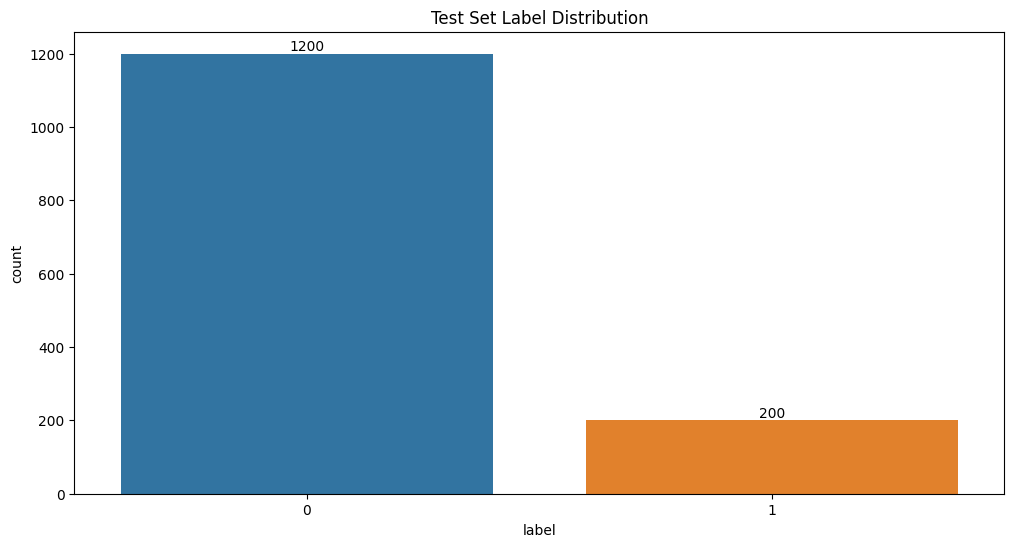

In [38]:
print(len(isarcasm_test))
fig = plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=isarcasm_test)
ax.bar_label(ax.containers[0])
plt.title("Test Set Label Distribution")

## Construct DatasetDict and Export

In [39]:
# reconstitute the updated datafames into a DatasetDict object
train_dataset = Dataset.from_pandas(isarcasm_train, preserve_index=False)
validate_dataset = Dataset.from_pandas(isarcasm_validation, preserve_index=False)
test_dataset = Dataset.from_pandas(isarcasm_test, preserve_index=False)
isarcasm_datasets = datasets.DatasetDict({"train": train_dataset, 
                                     "validation":validate_dataset, 
                                     "test":test_dataset})

In [40]:
isarcasm_datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 4266
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 628
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1400
    })
})

In [42]:
isarcasm_datasets.save_to_disk("data/target_iSarcasmEval/itesd_iSarcasmEval_balanced.hf")

Saving the dataset (0/1 shards):   0%|          | 0/4266 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/628 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1400 [00:00<?, ? examples/s]